In [10]:
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
import seaborn as sns

In [22]:
sns.set("notebook", font_scale=3, rc={'figure.figsize':(10,8)}, style='whitegrid')
plt.rc("axes.spines", top=False, right=False)

In [12]:
n_participants = 4
n_means = 3
n_samples = n_means**2

min_p = 0.65
max_p = 0.90
step_p = 0.10

min_e = 10
max_e  = 40
step_e = 10

In [13]:
# conflict_means = np.linspace(min_p, max_p, step_=n_means, endpoint=False)
# vol_means = np.linspace(min_e, max_e, num=n_means, endpoint=False)

conflict_means = np.arange(min_p, max_p, step_p)
vol_means = np.arange(min_e, max_e, step_e)

In [14]:
conflict_means, vol_means

(array([ 0.65,  0.75,  0.85]), array([10, 20, 30]))

In [15]:
all_combinations = np.asarray(list(product(conflict_means, vol_means)))

In [16]:
x_vol = all_combinations[:,1]
y_conf = all_combinations[:,0]

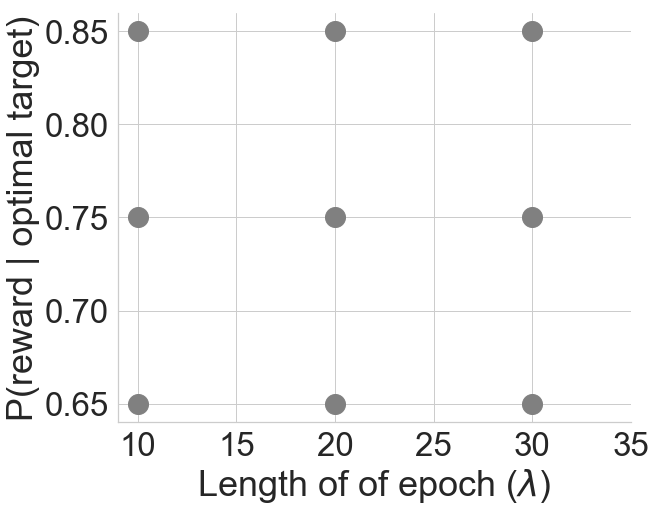

In [27]:
plt.plot(x_vol,y_conf, '.', markersize=40, color='gray')
plt.xlabel('Length of of epoch ' +  r'($\lambda$)')
plt.ylabel('P(reward | optimal target)')
plt.xticks(np.arange(min_e, max_e, 5))
plt.yticks(np.arange(min_p, max_p, .05))
sns.despine()
plt.tight_layout()
# ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.savefig('sampling_conflict_vol.pdf', dpi=300, tight=True)

In [43]:
#for each subject, randomly sample the means from this space to attempt maximum coverage
#assuming each subject stands alone as an experiment, "counterbalance" order across sub.

#just did this using random sampling, not latin hypercube sampling

In [44]:
param_set=np.matrix([x_vol, y_conf]).transpose()

In [46]:
idx = np.arange(0,n_samples)
c_order = np.empty([n_participants,n_samples])
for p in range(n_participants):
    np.random.shuffle(idx)
    c_order[p,:] =  idx
c_order = c_order.astype('int64')

In [47]:
c_order

array([[7, 0, 8, 1, 4, 2, 3, 6, 5],
       [5, 4, 6, 0, 1, 2, 8, 7, 3],
       [5, 6, 1, 7, 0, 8, 4, 3, 2],
       [6, 4, 8, 2, 0, 7, 3, 5, 1]])

In [48]:
param_sets = []

for p in range(n_participants): 
    param_sets.append(param_set[c_order[p]])

In [49]:
param_sets

[matrix([[ 25.  ,   0.85],
         [ 15.  ,   0.65],
         [ 35.  ,   0.85],
         [ 25.  ,   0.65],
         [ 25.  ,   0.75],
         [ 35.  ,   0.65],
         [ 15.  ,   0.75],
         [ 15.  ,   0.85],
         [ 35.  ,   0.75]]), matrix([[ 35.  ,   0.75],
         [ 25.  ,   0.75],
         [ 15.  ,   0.85],
         [ 15.  ,   0.65],
         [ 25.  ,   0.65],
         [ 35.  ,   0.65],
         [ 35.  ,   0.85],
         [ 25.  ,   0.85],
         [ 15.  ,   0.75]]), matrix([[ 35.  ,   0.75],
         [ 15.  ,   0.85],
         [ 25.  ,   0.65],
         [ 25.  ,   0.85],
         [ 15.  ,   0.65],
         [ 35.  ,   0.85],
         [ 25.  ,   0.75],
         [ 15.  ,   0.75],
         [ 35.  ,   0.65]]), matrix([[ 15.  ,   0.85],
         [ 25.  ,   0.75],
         [ 35.  ,   0.85],
         [ 35.  ,   0.65],
         [ 15.  ,   0.65],
         [ 25.  ,   0.85],
         [ 15.  ,   0.75],
         [ 35.  ,   0.75],
         [ 25.  ,   0.65]])]